# Livneh Wrfcf Bias 2017-02-05 to 2017-02-17 Over California and Nevada

In [1]:
# imports
import numpy
import Nio
import Ngl
from IPython import display
import netCDF4 as nc
from datetime import date
from datetime import timedelta
import xarray as xr
import xesmf as xe
import pandas as pd

In [2]:
# read in daily difference datasets
dif_06 = xr.open_dataarray('./dif_6_bestbias.nc')
dif_07 = xr.open_dataarray('./dif_7_bestbias.nc')
dif_08 = xr.open_dataarray('./dif_8_bestbias.nc')
dif_09 = xr.open_dataarray('./dif_9_bestbias.nc')
dif_10 = xr.open_dataarray('./dif_10_bestbias.nc')
dif_11 = xr.open_dataarray('./dif_11_bestbias.nc')
dif_12 = xr.open_dataarray('./dif_12_bestbias.nc')
dif_13 = xr.open_dataarray('./dif_13_bestbias.nc')
dif_14 = xr.open_dataarray('./dif_14_bestbias.nc')
dif_15 = xr.open_dataarray('./dif_15_bestbias.nc')

# define dictionary
dif_dict = {6:dif_06, 7:dif_07, 8:dif_08, 9:dif_09, 
            10:dif_10, 11:dif_11, 12:dif_12, 13:dif_13, 14:dif_14, 
            15:dif_15}

In [3]:
# average the difference over the 13 days, returns DataArray object
def bias_arr():
    next_key = 7
    temp = dif_dict[6].data.flatten()
    while next_key <= 15: #17
        arr1 = temp
        arr2 = dif_dict[next_key].data.flatten()
        next_key += 1
        temp = numpy.add(arr1, arr2)
    bias = temp / 10 #13
    return bias

bias_out = bias_arr()
bias_out = numpy.array_split(bias_out, 444)
lat_coord = dif_dict[6]['lat'].data.flatten()
lon_coord = dif_dict[6]['lon'].data.flatten()
bias_out = xr.DataArray(bias_out, coords = [lat_coord, lon_coord], dims = ['lat', 'lon'])
bias_out

<xarray.DataArray (lat: 444, lon: 922)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 25.16 25.22 25.28 25.34 ... 52.66 52.72 52.78 52.84
  * lon      (lon) float64 -124.6 -124.5 -124.5 -124.4 ... -67.16 -67.09 -67.03

In [4]:
# some values for reference
numpy.unique(bias_out), max(numpy.unique(bias_out)), min(numpy.unique(bias_out))

(array([-9.10338285, -8.66056307, -8.55583378, ...,         nan,
                nan,         nan]),
 8.697178209231122,
 -9.10338285116369)

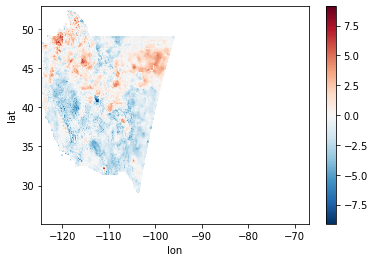

In [5]:
# test plot
bias_out.plot()

In [6]:
# convert dif_arr to masked array to overlook NaNs
import numpy.ma as ma
m_out = ma.masked_invalid(bias_out.data)
m_out

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

In [7]:
# extract CA/NV chunk (n < 43 lat, n > 31 lat, n > -113 lon)
lat_drop = bias_out.where(bias_out.lat < 42, drop = True)
lat_drop = lat_drop.where(lat_drop.lat > 31, drop = True)
lon_drop = lat_drop.where(lat_drop.lon < -114, drop = True)
lon_drop

<xarray.DataArray (lat: 176, lon: 170)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,  0.03723329,
         0.03106125,  0.05033049],
       [        nan,         nan,         nan, ..., -0.33580005,
        -0.03328   , -0.2694339 ],
       [        nan,         nan,         nan, ..., -0.96901272,
        -0.78713139,  0.30894837]])
Coordinates:
  * lat      (lat) float64 31.03 31.09 31.16 31.22 ... 41.78 41.84 41.91 41.97
  * lon      (lon) float64 -124.6 -124.5 -124.5 -124.4 ... -114.2 -114.1 -114.0

In [8]:
# convert to masked array to overlook NaNs
m_out = ma.masked_invalid(lon_drop)
m_out

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., 0.03723329354015163, 0.03106124524382494,
         0.05033048810639116],
        [--, --, --, ..., -0.33580005185517053, -0.03328000303640692,
         -0.26943390434828984],
        [--, --, --, ..., -0.969012721835611, -0.7871313894539241,
         0.30894837499538425]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=1e+20)

In [9]:
# numerical data, average across CA/NV region
numpy.mean(m_out)

-1.3745045475158366

In [10]:
# workstation
wks_type2 = "png"
wks2 = Ngl.open_wks(wks_type2,"17_bias_ca_nv_bestbias_NG-GR-NQ-BD")

In [11]:
# defining variables
temp = m_out
tmax_lon  =  lon_drop['lon'].data.flatten()
tmax_lat  =  lon_drop['lat'].data.flatten()
tmax_nlon =  len(tmax_lon)
tmax_nlat =  len(tmax_lat)

In [12]:
# XY of overlay plot
resources = Ngl.Resources()
resources.sfXCStartV = min(tmax_lon)
resources.sfXCEndV   = max(tmax_lon)
resources.sfYCStartV = min(tmax_lat)
resources.sfYCEndV   = max(tmax_lat)

# fill missing values as needed
if hasattr(temp,"_FillValue"):
    resources.sfMissingValueV = temp[0]._FillValue

# color map (sensitive to smaller values)
cmap = ['Ghostwhite', 'Grey0', 
        'Purple4', 'RoyalBlue3', 'RoyalBlue1', 'DeepSkyBlue', 'Cyan', 'DarkTurquoise', 
        'SeaGreen2', 'SpringGreen', 'Chartreuse', 'GreenYellow', 'OliveDrab2', 'Yellow', 
        'Gold', 'Orange', 'DarkOrange', 'Red', 'Red']

# plot styling
resources.wkColorMap = cmap
Ngl.set_values(wks2,resources)
resources.cnLevelSelectionMode = "ManualLevels"
resources.cnMinLevelValF       = -7
resources.cnMaxLevelValF       = 7
resources.cnLevelSpacingF      = 1
resources.tiXAxisString = "~F25~Longitude"
resources.tiYAxisString = "~F25~Latitude"
resources.cnFillOn              = True    
resources.cnLineLabelsOn        = False  
resources.cnInfoLabelOn         = False  
resources.nglSpreadColorEnd     = -2
resources.mpProjection = "LambertEqualArea" 
resources.mpCenterLonF = (tmax_lon[tmax_nlon-1] + tmax_lon[0])/2
resources.mpCenterLatF = (tmax_lat[tmax_nlat-1] + tmax_lat[0])/2
resources.mpLimitMode = "LatLon"
resources.mpMinLonF   = min(tmax_lon)
resources.mpMaxLonF   = max(tmax_lon)
resources.mpMinLatF   = min(tmax_lat)
resources.mpMaxLatF   = max(tmax_lat)
resources.mpOutlineBoundarySets = "GeophysicalAndUSStates"
resources.mpPerimOn   = True
resources.cnLinesOn   = False
resources.pmTickMarkDisplayMode = "Never"
resources.tiMainString = "~F26~Wrfcf, Livneh Bias CA/NV (Best Bias), 2017-02-05 to 2017-02-17, NG-GR-NQ-BD"
resources.lbOrientation  = "Horizontal"
resources.lbTitleString  = "~F25~Temp (C)" 

In [13]:
# plot
map = Ngl.contour_map(wks2,temp,resources)

In [14]:
# clean up
del map
del resources
Ngl.end()

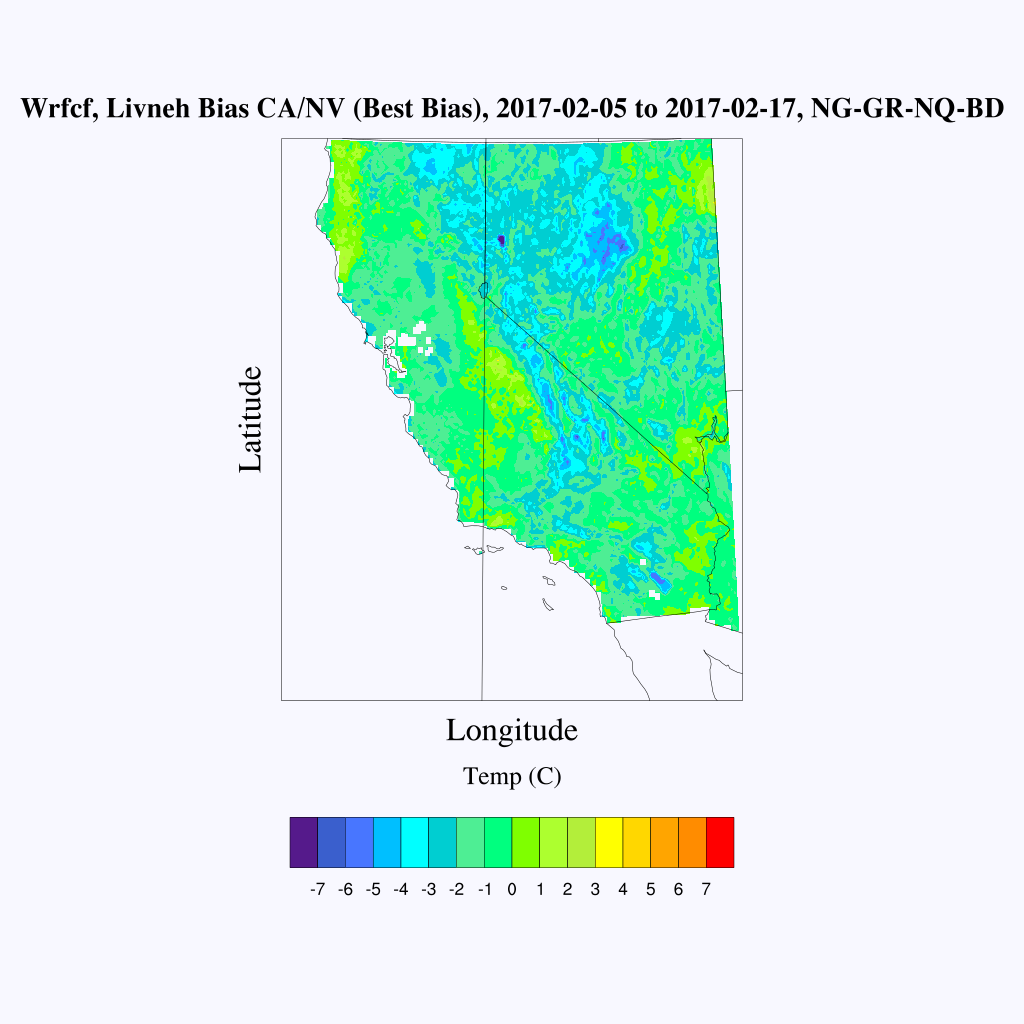

In [15]:
# display plot
display.Image("./17_bias_ca_nv_bestbias_NG-GR-NQ-BD.png")